In [ ]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [ ]:
import zipfile
import io

# Specify the file name
zip_file_name = "archive (1).zip"

# Unzip the file
with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as zip_ref:
    zip_ref.extractall("fer2013")


CNN-4 layers

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


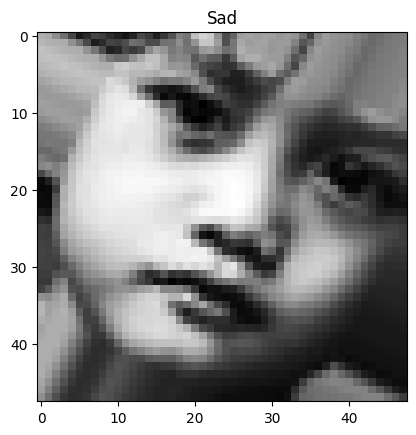

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

IMG_HEIGHT=48
IMG_WIDTH = 48
batch_size=32

train_data_dir='fer2013/train/'
validation_data_dir='fer2013/test/'

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()
##########################################################







In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
###########################################################
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


train_path = "fer2013/train/"
test_path = "fer2013/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


epochs=50

checkpoint_path = "emotion_model.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size, callbacks=[checkpoint, early_stopping])

model.save('emotion_detection_model_100epochs.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
897/897 [==============================] - ETA: 0s - loss: 1.6771 - accuracy: 0.3241
Epoch 2: val_loss improved from 1.68288 to 1.53527, saving model to emotion_model.h5
897/897 [==============================] - 31s 35ms/step - loss: 1.6771 - accuracy: 0.3241 - val_loss: 1.5353 - val_accuracy: 0.4009
Epoch 3/50
896/897 [============================>.] - ETA: 0s - loss: 1.5464 - accuracy: 0.3960
Epoch 3: val_loss improved from 1.53527 to 1.37203, saving model to emotion_model.h5
897/897 [==============================] - 32s 35ms/step - loss: 1.5462 - accuracy: 0.3962 - val_loss: 1.3720 - val_accuracy: 0.4721
Epoch 4/50
897/897 [==============================] - ETA: 0s - loss: 1.4513 - accuracy: 0.4356
Epoch 4: val_loss improved from 1.37203 to 1.30734, saving model to emotion_model.h5
897/897 [==============================] - 32s 36ms/step - loss: 1.4513 - accuracy: 0.4356 - val_loss: 1.3073 - val_accuracy: 0.4955
Epoch 5/50
896/897 [============================>.] - ETA:

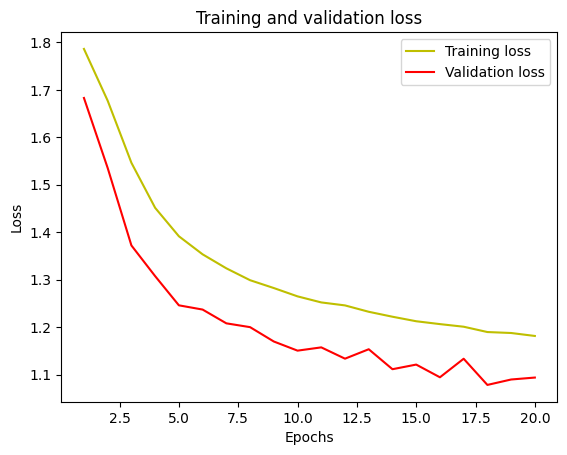

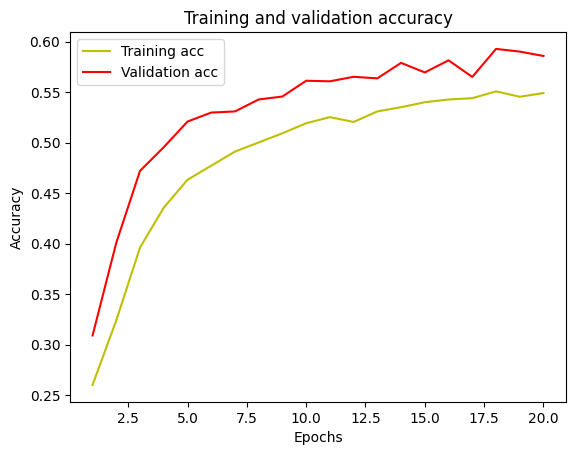

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 156ms/step
Accuracy =  0.53125


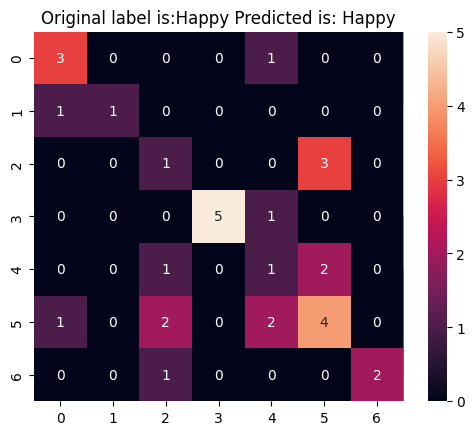

In [ ]:
####################################################################
from keras.models import load_model


#Test the model
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

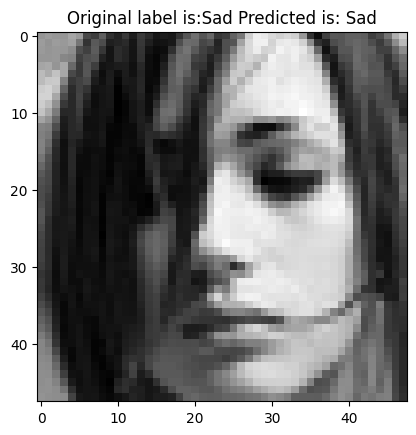

In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [ ]:
!pip install tf-explain



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
img_path = f"fer2013/test/disgust/PrivateTest_11895083.jpg"

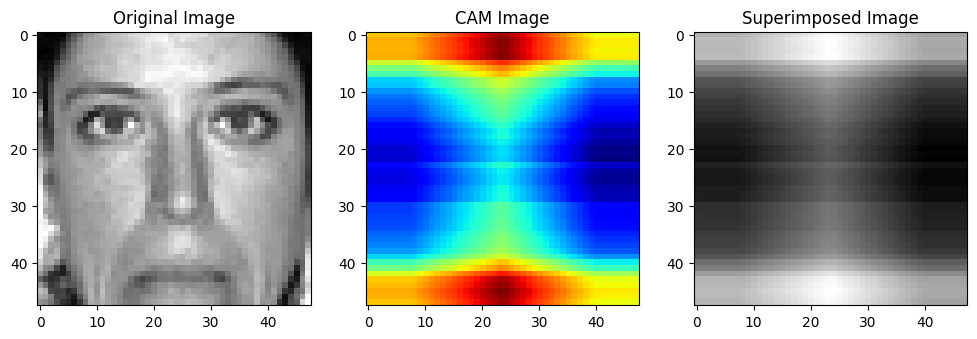

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from tf_explain.core.grad_cam import GradCAM
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

# Function to generate CAM using tf-explain
def generate_cam_tf_explain(model, img_path, class_index=None):
    # Load and preprocess the image
    img = image.load_img(img_path, color_mode="grayscale", target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize to [0,1]

    # Create an instance of GradCAM
    explainer = GradCAM()

    # Find the target layer for CAM
    target_layer = None
    for layer in model.layers:
        if 'conv2d' in layer.name.lower():
            target_layer = layer.name
            break

    if target_layer is None:
        raise ValueError("Target layer not found")

    # Generate CAM
    grid = explainer.explain((img_array, None), model, layer_name=target_layer, class_index=class_index)

    # Resize the CAM to match the original image size
    cam = cv2.resize(grid[0], (img_array.shape[2], img_array.shape[1]))

    # Apply the CAM as an overlay on the original image
    cam_overlay = np.uint8(255 * cam)
    img_with_overlay = cv2.addWeighted(img_array[0].astype('uint8'), 0.5, cam_overlay, 0.5, 0)

    return img_array[0], cam_overlay, img_with_overlay

# Load your trained model
model = load_model('emotion_detection_model_100epochs.h5', compile=False)

original_img, cam_img, superimposed_img = generate_cam_tf_explain(model, img_path, class_index=None)

# Display images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_img[:, :, 0], cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(cam_img, cmap='jet')
plt.title("CAM Image")

plt.subplot(1, 3, 3)
plt.imshow(superimposed_img, cmap='gray')  # Remove [:, :, 0]
plt.title("Superimposed Image")

plt.show()
